# Obtain & Loading Data

In [1]:
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# Read in the data with read_csv() into a Pandas Dataframe
housing_df = pd.read_csv('housing.csv')

# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Understanding the basics of our data

In [3]:
# Use .shape to understand how many observations (ie rows/records) of the dataset
# The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.
# (row count, column count)
housing_df.shape

(20640, 10)

In [4]:
# Using .head() function to view the first few observations (i.e. rows/records) of the dataset 
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Using .tail() function to view the last few observations (i.e. records) of the dataset 
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Preparing and Processing our Data

#### Searching for empty values to clean data

In [7]:
# Verify which features have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Calculate the % of missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0] * 100

1.002906976744186

#### Here, we will use imputation to handle missing data

In [9]:
from sklearn.impute import KNNImputer

# create a temporary copy of the dataset
housing_df_temp = housing_df.copy()

# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object; other columns are float64
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

# extract columns that contain at least one missing valuet
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

#### Impute missing data with ML

In [10]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(housing_df_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(housing_df_temp)

# convert the array values to a dataframe with the appropriate column names
housing_df_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [11]:
# overlay the imputed column over the old column with missing values

# loop through the list of columns and overlay each one
for column_name in new_column_list:
    housing_df[column_name] = housing_df_temp.replace(housing_df[column_name],housing_df[column_name])

# confirm columns no longer contain null data
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
# check that there are no columns with missing values
housing_df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

### Let's use visualizations to understand the relationship of the target variable with other features

##### Histograms

Text(0.5, 0, 'House Values')

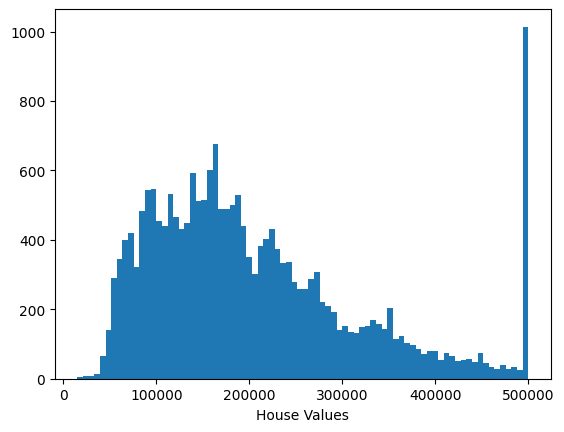

In [13]:
# For our histogram, let's first plot the distribution of our target variable, median_house_value, using a histogram

# bins -> amount of columns
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")         

In [14]:
# From out histogram above we can notice that most houses prices are normally distributed around the 100k - 200k range value.
# We can also notice some outliers in the 500k range.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

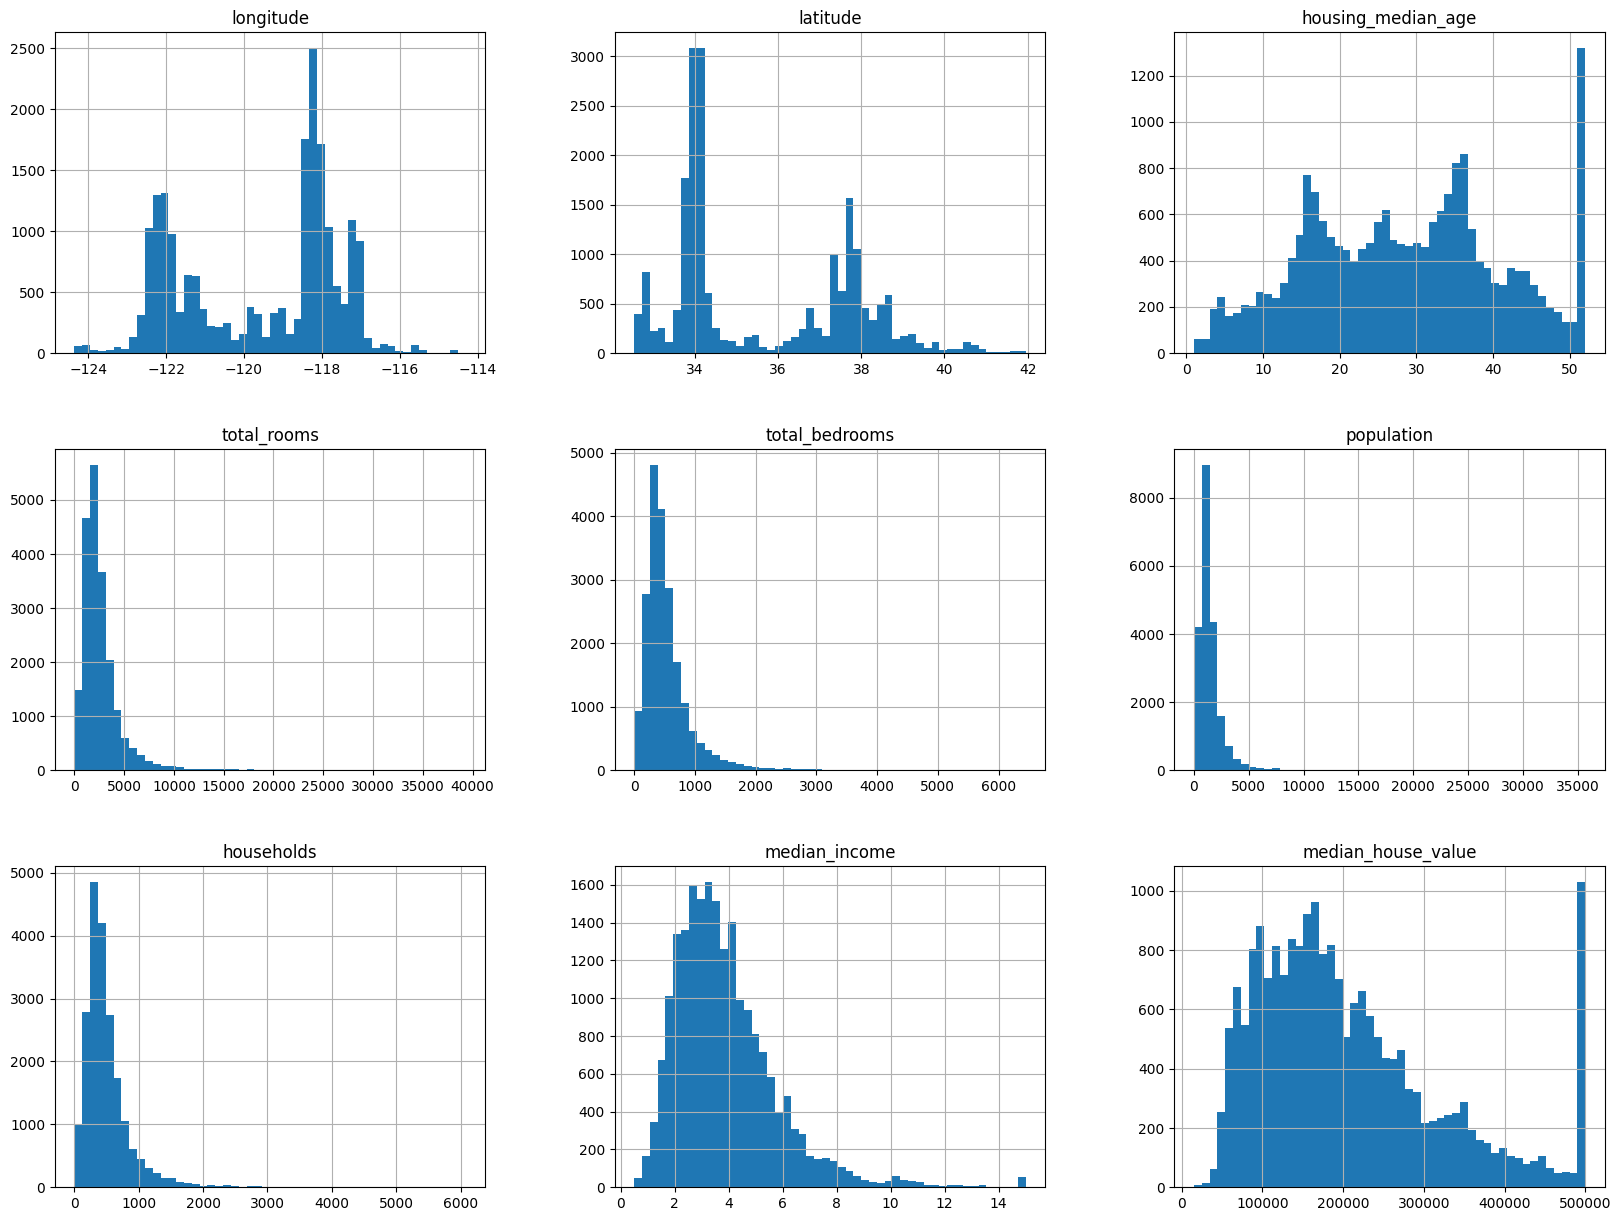

In [15]:
# Now for our next step, let's plot a histogram for the remainig features of the house. (Except for ocean proximity, as it is a non numerical value)
housing_df.hist(bins=50, figsize=(20,15))

##### Using heatmap to show correlation

In [16]:
# Now, let's plot a correlation matrix for each pair of columns in our data

# First, let's remove the last column so that there are only numerical values present in the data set
numerical_columns = housing_df.iloc[:, :-1]

corr = numerical_columns.corr() #data frame correlation function 
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -0.079809   
housing_

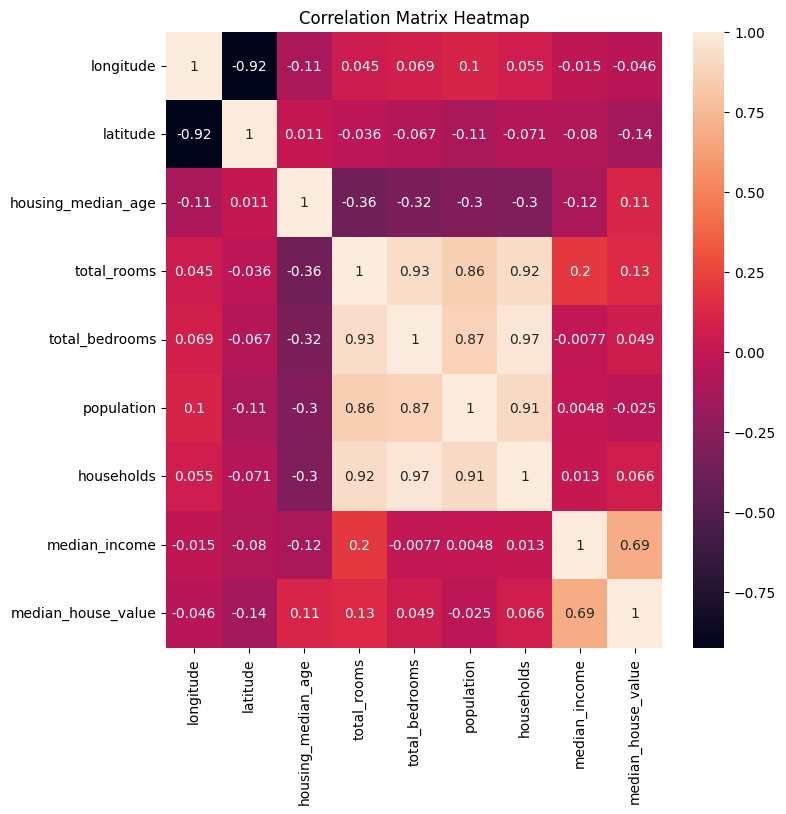

In [17]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Encoding categorical data

In [18]:
# Looking at our correlation map we can observe that some of the data is highly correlated with one another. 
# We can combine this data into one and find their ratio as fewer fields is generally better for our model performance

# calculate ratio of total rooms to household
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households'] 

# bedrooms per room is the ration of total bedrooms to total rooms
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms'] 

# population per household is the ratio of people living in each house
housing_df['population_per_household'] = housing_df['population']/housing_df['households']  

# coods is the ratio of longitude to latitude 
housing_df['coods'] = housing_df['longitude']/housing_df['latitude'] 

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coods                     20640 non-null  float64
dtypes: flo

In [19]:
# Now that we have correlated the fields that were highly correlated, we can eliminate them from out table.

housing_df = housing_df.drop('total_rooms', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)

housing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coods                     20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [20]:
housing_df.head()


,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,coods
0,41.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,-3.226769
1,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,-3.228209
2,52.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,-3.229590
3,52.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,-3.229855
4,52.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,-3.229855


##### Heatmap after removing correlation

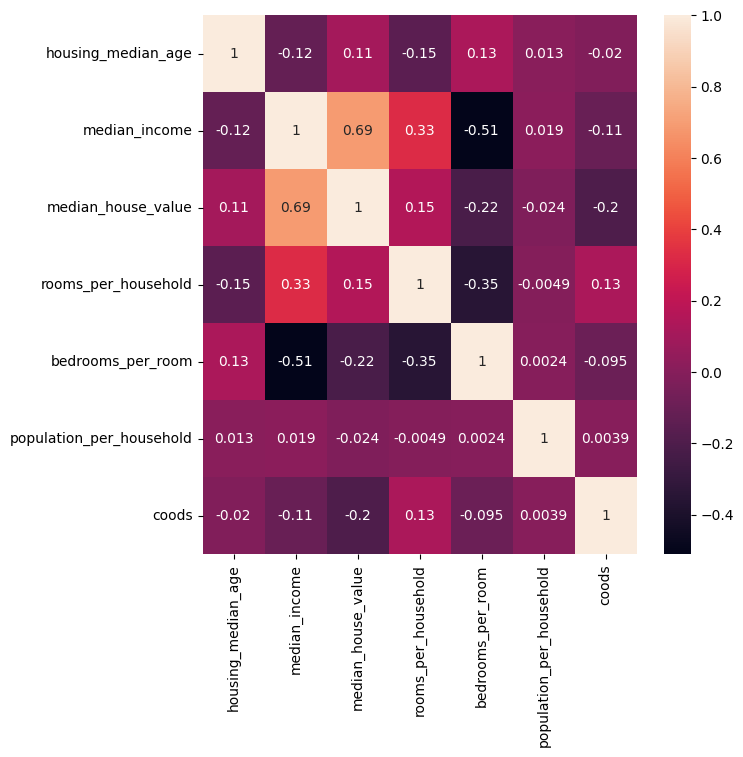

In [21]:
num_col = housing_df.drop('ocean_proximity', axis=1)
corr = num_col.corr() #data frame correlation function 

plt.figure(figsize=(7,7))

sns.heatmap(corr, annot=True)
plt.show()

In [22]:
# We need to deal with the ocean proximity column, as it is not a numerical value our model cannot work with it. 
# Let's check to see what are the unique values on that column

housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### One-Hot Encoding

In [24]:
# Using panda get_dummies function, we are able to transform the ocean_proximity column in binary data
# which makes it possible for our algorithm to use in the prediciton
housing_df_encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity']).astype(int)

housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coods,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,8,452600,6,0,2,-3,0,0,0,1,0
1,21,8,358500,6,0,2,-3,0,0,0,1,0
2,52,7,352100,8,0,2,-3,0,0,0,1,0
3,52,5,341300,5,0,2,-3,0,0,0,1,0
4,52,3,342200,6,0,2,-3,0,0,0,1,0


### Train the Model 

In [25]:
import sklearn
from sklearn.model_selection import train_test_split



In [26]:
# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
housing_df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_df_encoded.columns]

# Split target variable and feature variables
X = housing_df_encoded[['housing_median_age', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 
                        'population_per_household', 'coods', 'ocean_proximity__1h_ocean', 'ocean_proximity_inland', 'ocean_proximity_island',
                       'ocean_proximity_near_bay', 'ocean_proximity_near_ocean']]
Y = housing_df_encoded['median_house_value']

print(X)

       housing_median_age  median_income  rooms_per_household  \
0                      41              8                    6   
1                      21              8                    6   
2                      52              7                    8   
3                      52              5                    5   
4                      52              3                    6   
...                   ...            ...                  ...   
20635                  25              1                    5   
20636                  18              2                    6   
20637                  17              1                    5   
20638                  18              1                    5   
20639                  16              2                    5   

       bedrooms_per_room  population_per_household  coods  \
0                      0                         2     -3   
1                      0                         2     -3   
2                      0            

#### Split data into training & test data

In [27]:
# In order to test the effectivity of our model, we must leave some data to test it after it have been trained.
# Here we will use 70% of the data to train the model, and the remaining to test it.
# X -> array with the inputs; y -> array of the outputs
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, shuffle=True, test_size=0.3)

# Check the split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 11)
(6192, 11)
(14448,)
(6192,)


### Linear Regression Model Training

In [28]:
# Scikit-learn provides us with a LinearRegression we can use to train the model and evaluate the result sets
from sklearn.linear_model import LinearRegression

# Creating a linear regressor with all the feature variables
reg_model = LinearRegression()

# Train the model using the training sets
reg_model.fit(X_train, y_train)

LinearRegression()

### Let's now run the predictions

In [29]:
# We will run the predictions for both training and testing data
y_pred_test = reg_model.predict(X_test)

### Evaluate the model 

In [30]:
# Firstly, let's compare the actual values to the values generated by the model 
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

pred_test_df

,Actual,Predicted
20046,47700,61166.862054
3024,45800,103537.838597
15663,500001,245290.988237
20484,218600,276305.114394
9814,278000,234004.986862
...,...,...
17505,237500,192533.177808
13512,67300,75767.936237
10842,218400,199597.764264
16559,119400,121418.299292


### Evaluate the model using the 𝑅^2 metric

In [31]:
# Determine accuracy using Rˆ2
# Rˆ2 : R squared is another common way to evaluate the performance of a regression model. 
# The closer to 1, the better our model will perform, the closer to 0, the poorer.
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)

print("Rˆ2 Test: {}".format(r2_reg_model_test))

Rˆ2 Test: 0.58


### RandomForestRegressor - Model Training

In [32]:
# Let's now try another common ML algorithm : Random Forest
from sklearn.ensemble import RandomForestRegressor

# Let's create a regressor using the available features
rf_model = RandomForestRegressor(n_estimators=10,random_state=10)

# Train the model using training sets
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

### Run the predictions

In [33]:
y_rf_pred_test = rf_model.predict(X_test)

### Evaluate the model 

In [34]:
# To evaluate the model we will compare the predicted values with the actual values

rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})

rf_pred_test_df

,Actual,Predicted
20046,47700,60262.500000
3024,45800,100447.888889
15663,500001,443837.271793
20484,218600,266147.500000
9814,278000,192335.833333
...,...,...
17505,237500,139506.500000
13512,67300,62712.500000
10842,218400,217905.666667
16559,119400,116886.059524


In [35]:
# We will determine accuracy using the Rˆ2
from sklearn.metrics import r2_score

score = r2_score(y_test, y_rf_pred_test)

print ("Rˆ2 - {}%".format(round(score, 2) * 100))

Rˆ2 - 62.0%


In [36]:
# Determine RMSE - Root Mean Squared Error on the test data
import math
 
MSE = np.square(np.subtract(y_test,y_rf_pred_test)).mean() 
 
RMSE = math.sqrt(MSE)

print('RMSE on test data: ', RMSE)

RMSE on test data:  71044.64575357692


# Determine Feature Importance 

<Axes: >

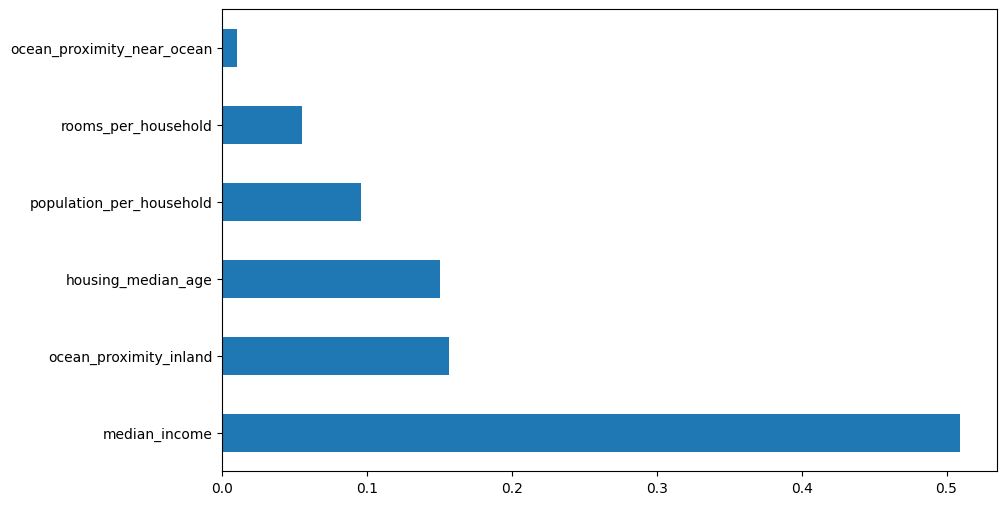

In [37]:
# Determine feature importance: random forest algorithm is that it gives us the 'feature importance' 
# for all the variables in the data plot the 6 most important features

plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh')

In [38]:
# Now, let's train our models using only these 6 features and try to observer a change in the RMSE

# training data with 5 most important features
train_x_if = X_train[['rooms_per_household', 'housing_median_age', 'ocean_proximity_near_ocean', 'ocean_proximity_inland','population_per_household','median_income']]
test_x_if = X_test[['rooms_per_household', 'housing_median_age', 'ocean_proximity_near_ocean', 'ocean_proximity_inland','population_per_household','median_income']]

# create an object of the RandfomForestRegressor Model
rf_model_if = RandomForestRegressor(n_estimators=10,random_state=10)

# fit the model with the training data
rf_model_if.fit(train_x_if, y_train)

# predict the target on the test data
predict_test_with_if = rf_model_if.predict(test_x_if)

In [39]:
#Root Mean Squared Error on the train and test data
MSE_2 = np.square(np.subtract(y_test,predict_test_with_if)).mean() 
 
RMSE_2 = math.sqrt(MSE_2)


print('RMSE on test data: ',  RMSE_2)

RMSE on test data:  71027.13271085365


## XGBoost - Model Training

In [40]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

# Now let's train the model with the training sets
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Run the predictions and evaluate the model

In [41]:
#running predictions on the training data
y_xgb_pred_test = xgb_model.predict(X_test)

In [42]:
#compare the actual values (ie, target) with the values predicted by the model
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})

xgb_pred_test_df

,Actual,Predicted
20046,47700,67674.164062
3024,45800,95362.117188
15663,500001,433845.125000
20484,218600,249653.265625
9814,278000,202965.656250
...,...,...
17505,237500,172896.171875
13512,67300,58652.402344
10842,218400,210640.953125
16559,119400,106471.562500


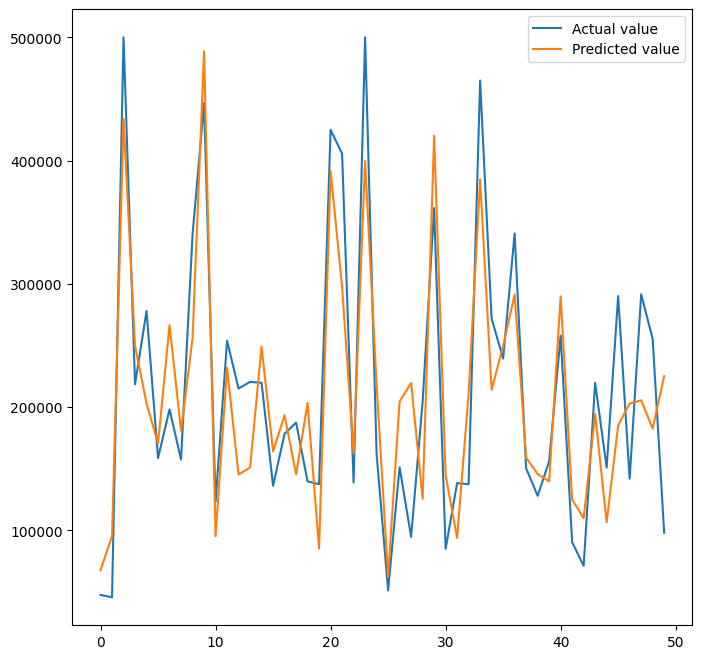

In [43]:
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [44]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_xgb_pred_test)

print("R^2 - {}%".format(round(score, 2) *100))

R^2 - 68.0%


In [45]:
# Determine mean square error and root mean square error
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_xgb_pred_test)
rmse = math.sqrt(mean_squared_error(y_test, y_xgb_pred_test))

print(mse)
print(rmse)

4191937426.62074
64745.172998616195


In [46]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_xgb_pred_test))

45677.45803872436


## Cross Validation

In [48]:
# Let's build and score a model on multiple folds with cross-validation
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(xgb_model, X, Y, scoring='r2', error_score='raise', cv=cv, n_jobs=-1, verbose=1)

#average of all the r2 scores across runs
print(scores.mean())

0.6953751047020115


## Hyperparameter Tuning

In [49]:
# determine hyperparameter available for tuning
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
xgb_model_2 = XGBRegressor(
    gamma=0.05,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1,
    verbosity=1)

xgb_model_2.fit(X_train, y_train)


#run the predictions on the training and testing data
y_xgb_2_pred_test = xgb_model_2.predict(X_test)

In [51]:
# compare the actual values (ie, target) with the values predicted by the model
xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})

xgb_2_pred_test_df

,Actual,Predicted
20046,47700,69395.484375
3024,45800,96231.945312
15663,500001,425054.531250
20484,218600,246800.843750
9814,278000,211654.453125
...,...,...
17505,237500,172444.718750
13512,67300,64954.933594
10842,218400,207479.171875
16559,119400,106725.242188


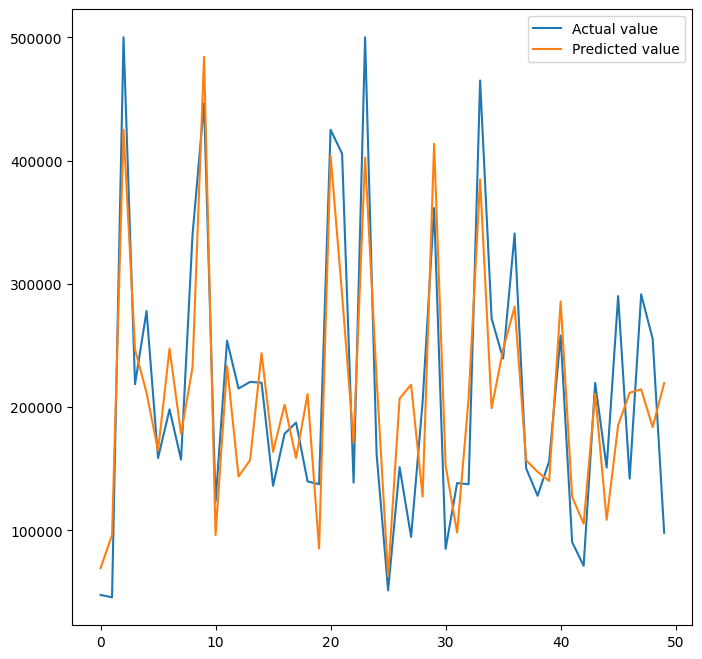

In [52]:
fig= plt.figure(figsize=(8,8))
xgb_2_pred_test_df = xgb_2_pred_test_df.reset_index()
xgb_2_pred_test_df = xgb_2_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_2_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [53]:
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(y_test, y_xgb_2_pred_test))
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 251.52


In [ ]:
# Determine accuracy uisng 𝑅^2
r2_xgb_model_2_test = round(xgb_model_2.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 0.7
